<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-05-03-panel-regression-multilevel-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3. Panel Regression Models fit via {panelr} Package {.unnumbered}

The `panelr` package in R is designed for handling and analyzing panel data, also known as longitudinal data or time-series cross-sectional data. Panel data involves repeated measurements of the same units (such as individuals, firms, or countries) over multiple time periods. The `panelr` package provides a user-friendly interface and functions that simplify the process of preparing, modeling, and interpreting panel data.


## Overview

Panel data analysis is a common approach in social sciences, economics, and other fields where researchers are interested in studying the dynamics of individual units over time. Panel data sets are characterized by having both cross-sectional and time-series dimensions, allowing researchers to examine how variables change within and between units over time. Panel regression models are used to analyze panel data and estimate the relationships between variables while accounting for individual-specific effects and time-varying predictors. The `panelr` package provides a set of functions for working with panel data, including data preparation, model estimation, and interpretation.



### Key Features of `{panelr}`

1.  **Data Preparation**:
    -   Functions to reshape data between wide and long formats, which is crucial for panel data analysis.
    -   Handling missing data and creating lagged variables.
2.  **Modeling**:
    -   Support for various types of panel models, including fixed effects, random effects, and mixed effects models.
    -   Easy-to-use syntax for specifying models.
3.  **Interpretation**:
    -   Functions to extract and interpret model results, including fixed effects, random effects, and overall model fit.
    -   Visualization tools for plotting model predictions and effects.

### Example Functions

The `panelr` package provides several functions for working with panel data, including:

#### Regression models

Regression models for panel data can be fit using the following functions in the `panelr` package:

`wbm()`: Panel regression models fit via multilevel modeling

`wbgee()`: Panel regression models fit with GEE

`fdm()`: Estimate first differences models using GLS

`asym()`: Estimate asymmetric effects models using first differences

`asym_gee()`: Asymmetric effects models fit with GEE

`wbm_stan()`: Bayesian estimation of within-between models

#### Panel data wrangling

Data preparation and manipulation functions in `panelr` include:

`panel_data()` `as_pdata.frame()` `as_panel_data()` `as_panel()` Create panel data frames

`widen_panel()`Convert long panel data to wide format

`long_panel()` Convert wide panels to long format

`summary(<panel_data>)` Summarize panel data frames

`complete_data()` Filter out entities with too few observations

`model_frame()` Make model frames for panel_data objects

`unpanel()` Convert panel_data to regular data frame

`is_panel()` Check if object is panel_data

## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314972 sha256=9ca3a229c07f1d107a71f8e752315df1c6f1a11a632d560ddb171bea951adc94
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:




In [5]:
%%R
packages <- c('tidyverse',
              'DataExplorer',
              'dlookr',
              'DataExplorer',
              'rstatix',
              'corrplot',
              'Hmisc',
              'tseries',
              'stargazer',
              'plm',
              'panelr',
              'pglm',
              'geepack',
              'clubSandwich',
              'AER',
              'corrplot',
              'lmtest',
              'ggstatsplot',
              'gtsummary',
              'ggExtra',
              'gridExtra',
              'kableExtra',
              'GGally',
              'gplots'
              )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method          from  
  plot.transform  scales
  print.transform scales

  method            from
  as.zoo.data.frame zoo 

  method    from    
  bread.mlm sandwich

  method from   
  +.gg   ggplot2



   tidyverse DataExplorer       dlookr DataExplorer      rstatix     corrplot 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
       Hmisc      tseries    stargazer          plm       panelr         pglm 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
     geepack clubSandwich          AER     corrplot       lmtest  ggstatsplot 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
   gtsummary      ggExtra    gridExtra   kableExtra       GGally       gplots 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 


## Load R Packages

In [7]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:gplots"       "package:GGally"       "package:kableExtra"  
 [4] "package:gridExtra"    "package:ggExtra"      "package:gtsummary"   
 [7] "package:ggstatsplot"  "package:AER"          "package:survival"    
[10] "package:sandwich"     "package:lmtest"       "package:zoo"         
[13] "package:car"          "package:carData"      "package:clubSandwich"
[16] "package:geepack"      "package:pglm"         "package:maxLik"      
[19] "package:miscTools"    "package:panelr"       "package:lme4"        
[22] "package:Matrix"       "package:plm"          "package:stargazer"   
[25] "package:tseries"      "package:Hmisc"        "package:corrplot"    
[28] "package:rstatix"      "package:dlookr"       "package:DataExplorer"
[31] "package:lubridate"    "package:forcats"      "package:stringr"     
[34] "package:dplyr"        "package:purrr"        "package:readr"       
[37] "package:tidyr"        "package:tibble"       "package:ggplot2"     
[40] "pa

##  Panel regression models fit via multilevel modeling

The `wbm()` function in the `panelr` package fits panel regression models using multilevel modeling. This function is useful for estimating fixed effects, random effects, and mixed effects models for panel data. The `wbm()` function takes a formula as input, where the dependent variable is on the left-hand side, and the independent variables are on the right-hand side. The formula can include fixed effects, random effects, and other model specifications.


### Data

We use data from the `WageData` dataset in the `palenr` package to demonstrate the `wbm()` function. The `WageData` dataset come from the years 1976-1982 in the Panel Study of Income Dynamics (PSID), with information about the demographics and earnings of 595 individuals.




In [8]:
%%R
# Load the WageData dataset from the panelr package
data("WageData", package = "panelr")
head(WageData)

  exp wks occ ind south smsa ms fem union ed blk   lwage t id
1   3  32   0   0     1    0  1   0     0  9   0 5.56068 1  1
2   4  43   0   0     1    0  1   0     0  9   0 5.72031 2  1
3   5  40   0   0     1    0  1   0     0  9   0 5.99645 3  1
4   6  39   0   0     1    0  1   0     0  9   0 5.99645 4  1
5   7  42   0   1     1    0  1   0     0  9   0 6.06146 5  1
6   8  35   0   1     1    0  1   0     0  9   0 6.17379 6  1


### Data Preparation

`panel_data()` function is used to create a panel data object from the WageData dataset. The `panel_data()` function requires specifying the id variable (entity identifier) and the wave variable (time identifier) in the dataset. In this case, the id variable is `id` and the wave variable is `t`.

In [9]:
%%R
wages <- panel_data(WageData, id = id, wave = t)

### Fit "within-between"  Model

The code below fits a weighted balanced panel model using the `wbm()` function from the {panelr} package. The model aims to explain the log of wages (`lwage`) based on several independent variables and their interactions:

-   The lagged value of `union` membership (lag(union)).
-   The number of weeks worked (`wks`).
-   Main effects for being Black (`blk`) and being female (`fem)`.
-   An interaction term between being Black and lagged union membership (blk \* lag(union)).

`family =gaussian` use this to specify GLM link families. Default is `gaussian`, the linear model. Other options include binomial, poisson, and negative binomial. By default argument `model= "w-b"`, which specifies the `within-between` model.

In [10]:
%%R
model.wb <- wbm(lwage ~ lag(union) + wks | blk + fem | blk * lag(union),
                 family= gaussian(),
                 model = "w-b",
                 data = wages)
summary(model.wb)

MODEL INFO:
Entities: 595
Time periods: 2-7
Dependent variable: lwage
Model type: Linear mixed effects
Specification: within-between

MODEL FIT:
AIC = 1386.31, BIC = 1448.11
Pseudo-R² (fixed effects) = 0.13
Pseudo-R² (total) = 0.74
Entity ICC = 0.7

WITHIN EFFECTS:
---------------------------------------------------------
                    Est.   S.E.   t val.      d.f.      p
---------------- ------- ------ -------- --------- ------
lag(union)          0.06   0.03     2.28   2972.01   0.02
wks                -0.00   0.00    -1.51   2994.31   0.13
---------------------------------------------------------

BETWEEN EFFECTS:
---------------------------------------------------------------
                           Est.   S.E.   t val.     d.f.      p
----------------------- ------- ------ -------- -------- ------
(Intercept)                6.60   0.23    28.53   589.99   0.00
imean(lag(union))         -0.03   0.03    -0.80   589.98   0.42
imean(wks)                 0.00   0.00     0.91 

The output of the `summary()` function provides the coefficients, standard errors, t-values, and p-values for the model parameters. The `wbm()` function fits a within-between model with fixed effects for `blk` and `fem`, as well as an cross-level interaction term between `blk` and the lagged value of `union`. `imean()` is an internal function that calculates the individual-level mean, which represents the between-subjects effects of the time-varying predictors. The `wbm()` function also provides the overall model fit statistics, including the marginal and conditional `R-squared` values.

#### Model Diagnostics

The `wbm()` function also provides diagnostic plots to assess the model assumptions and identify potential issues. The `plot()` function can be used to visualize the model diagnostics, including the residuals, fitted values, and QQ plot of the residuals.

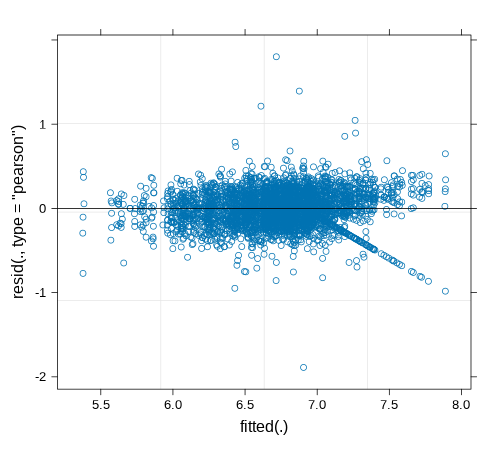

In [11]:
%%R -w 500 -h 450 -u px
plot(model.wb)

#### Predictions

The `predict()` function can be used to generate predictions from the fitted model. By specifying the argument `type = "response"`, the function returns the predicted values on the original scale of the dependent variable.

In [12]:
%%R
wages$predict<-predict(model.wb, type = "response", newdata = wages)
head(wages$predict)
wages.df<-na.omit(wages)

#### Prediction Performance


  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2

Attaching package: ‘ggpp’



    annotate




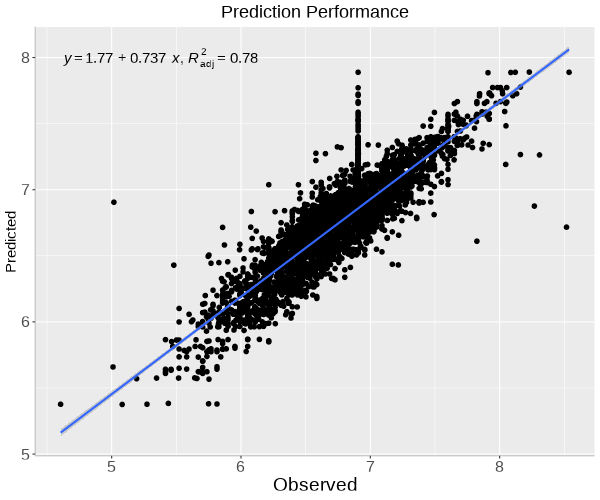

In [13]:
%%R -w 600 -h 500 -u px
library(ggpmisc)
formula<-y~x
ggplot(wages.df, aes(x=lwage, y=predict)) +
 geom_point(size=2) +
 # draw fitted line
  geom_smooth(method = "lm", formula = formula) +
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
 # add plot title
 ggtitle("Prediction Performance") +
 theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))+
  xlab("Observed") +
  ylab("Predicted")


#### Simulation

The `simulate()` function can be used to simulate data from the fitted model. By specifying the argument `nsim = 1000`, the function generates 1000 simulated datasets based on the model specifications.

In [14]:
%%R
sim.data<-simulate(model.wb, nsim = 1000)
wages.df$sim.mean<-rowMeans(sim.data)
summary(wages.df$sim.mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.041   6.758   6.790   6.727   6.810   6.880 


### Fit a "contextual" Model

To specify a model where occasion-level predictors do not have their means subtracted, use the argument `model = "contextual."` The term "contextual" refers to the interpretation of these variables when this option is selected.

**Occasion Level Predictors:** These predictors vary within units across different time points. For instance, in a panel data set, a variable like union membership may change over various years for the same individual.

**Mean Subtracted:** In some panel models, occasion-level predictors are mean-centered, meaning that the mean value of the predictor is subtracted from each observation. This isolates the within-unit variation.

**Contextual Specification:** If you prefer the model to use the raw values of the occasion-level predictors without mean subtraction, you can specify `model = "contextual."` This indicates that the predictors will be interpreted in their original scale and context.

By using the `model = "contextual"` argument, the model asserts that occasion-level predictors (e.g., `lag(union)`) will not have their means subtracted. Consequently, these predictors are interpreted in their original context, offering a "contextual" understanding of their effects on the dependent variable.

In [15]:
%%R
model.cont <- wbm(lwage ~ lag(union) + wks | blk + fem | blk * lag(union),
                 family= gaussian(),
                 model = "contextual",
                data = wages)
summary(model.cont)

MODEL INFO:
Entities: 595
Time periods: 2-7
Dependent variable: lwage
Model type: Linear mixed effects
Specification: contextual

MODEL FIT:
AIC = 1387.25, BIC = 1449.06
Pseudo-R² (fixed effects) = 0.13
Pseudo-R² (total) = 0.74
Entity ICC = 0.7

WITHIN EFFECTS:
---------------------------------------------------------
                    Est.   S.E.   t val.      d.f.      p
---------------- ------- ------ -------- --------- ------
lag(union)          0.05   0.03     1.95   3034.28   0.05
wks                -0.00   0.00    -1.55   2993.12   0.12
---------------------------------------------------------

CONTEXTUAL EFFECTS:
----------------------------------------------------------------
                           Est.   S.E.   t val.      d.f.      p
----------------------- ------- ------ -------- --------- ------
(Intercept)                6.62   0.23    28.54    591.57   0.00
imean(lag(union))         -0.08   0.04    -1.96   1292.37   0.05
imean(wks)                 0.01   0.00     1

### Fit a "between"  or Random Effect Model

If we want the model specified such that the occasion level predictors do, You may also use model = "between" to fit what is known as the random effects model, which does not disaggregate the within- and between-entity variation. To effectively specify the model while taking into account the occasion-level predictors, we can utilize the option `model = "between."` This approach aligns with what econometricians refer to as the random effects model. Unlike fixed effects models, the random effects model does not distinguish between variations that occur within individual entities—such as repeated measures over time—and those that occur between different entities. By employing this model, we can analyze data that captures both the

In [16]:
%%R
model.bet <- wbm(lwage ~ lag(union) + wks | blk + fem | blk * lag(union),
                 family= gaussian(),
                 model = "between",
                 data = wages)
summary(model.bet)

MODEL INFO:
Entities: 595
Time periods: 2-7
Dependent variable: lwage
Model type: Linear mixed effects
Specification: between

MODEL FIT:
AIC = 1376.58, BIC = 1426.02
Pseudo-R² (fixed effects) = 0.13
Pseudo-R² (total) = 0.74
Entity ICC = 0.7

BETWEEN EFFECTS:
----------------------------------------------------------
                     Est.   S.E.   t val.      d.f.      p
----------------- ------- ------ -------- --------- ------
(Intercept)          6.85   0.05   128.54   3547.62   0.00
lag(union)           0.02   0.02     0.76   2865.05   0.45
wks                 -0.00   0.00    -1.25   3249.08   0.21
blk                 -0.27   0.07    -3.79    801.21   0.00
fem                 -0.44   0.05    -8.95    593.56   0.00
----------------------------------------------------------

CROSS-LEVEL INTERACTIONS:
------------------------------------------------------------
                       Est.   S.E.   t val.      d.f.      p
-------------------- ------ ------ -------- --------- ------

## Panel Regression Models with Generalized Estimating Equations (GEE)

GEE is a population-averaged approach for analyzing panel (longitudinal) data that accounts for `within-cluster correlation` (e.g., repeated measurements within individuals, firms, or households). Unlike mixed-effects models, GEE does not model individual-specific random effects but instead uses a `working correlation structure` to adjust standard errors and coefficients for dependency in the data. Here’s how to use GEE for panel regression:

### Key Features of GEE are below:

1.  `Population-Averaged Effects`: Estimates marginal (average) effects across the population.\

2.  `Robustness`: Provides valid inference even if the correlation structure is misspecified (due to robust "sandwich" standard errors).\

3.  `Flexible Correlation Structures`:

    -   Independence: No correlation (equivalent to pooled OLS)
    -   Exchangeable: Constant correlation across time (e.g., $cor(y_it, y_is) = ρ$).
    -   AR(1): Correlation declines with time lag (e.g., $cor(y_it, y_i(t-1)) = ρ$).
    -   Unstructured: No constraints on correlation patterns.


### When to Use GEE?

1.  `Population-Averaged Inference`: When interest lies in average effects (e.g., policy impacts across a population).\
2.  `Robustness to Correlation Misspecification`: When the true correlation structure is unknown.\
3.  `Large Clusters`: Requires many clusters (e.g., ≥ 30) for reliable standard errors.



### GEE vs. Mixed-Effects Models

| **Aspect** | **GEE** | **Mixed-Effects Models** |
|------------------|-------------------------|-----------------------------|
| **Inference** | Population-averaged | Subject-specific |
| **Correlation** | Working correlation (adjusted) | Explicitly modeled (random effects) |
| **Efficiency** | Less efficient if RE is correct | More efficient if RE is correct |
| **Assumptions** | Robust to correlation misspec. | Requires correct random effects spec. |


### Fit a  Linear GEE Model

We will `WageData` dataset to fit a GEE model using the `wbgee()` function from the {panelr} package.

In [17]:
%%R
data("WageData", package = "panelr")
wages <- panel_data(WageData, id = id, wave = t)


The model aims to explain the log of wages (`lwage`) based on several independent variables and their interactions:

In [18]:
%%R
model.gee <- wbgee(lwage ~ lag(union) + wks | blk + fem | blk * lag(union),
           data = wages)
summary(model.gee)

MODEL INFO:
Entities: 595
Time periods: 2-7
Dependent variable: lwage
Model type: Linear GEE
Variance: ar1 (alpha = 0.85)
Specification: within-between

MODEL FIT:
QIC = 655.54, QICu = 653.36, CIC = 9.09

WITHIN EFFECTS:
-----------------------------------------------
                    Est.   S.E.   z val.      p
---------------- ------- ------ -------- ------
lag(union)          0.02   0.02     0.98   0.33
wks                -0.00   0.00    -0.82   0.41
-----------------------------------------------

BETWEEN EFFECTS:
------------------------------------------------------
                           Est.   S.E.   z val.      p
----------------------- ------- ------ -------- ------
(Intercept)                6.61   0.24    27.12   0.00
imean(lag(union))         -0.01   0.03    -0.40   0.69
imean(wks)                 0.00   0.01     0.75   0.45
blk                       -0.23   0.06    -3.86   0.00
fem                       -0.43   0.05    -8.94   0.00
---------------------------------

## First Differences Models using GLS

First differences models are a common approach to analyzing panel data when the focus is on the change in the dependent variable and the independent variables over time. The `fdm()` function in the `panelr` package estimates first differences models using Generalized Least Squares (GLS) estimation. This method is useful for examining the impact of time-varying predictors on the change in the dependent variable while controlling for individual-specific effects.

### Fit a First Differences Model

The code below fits a first differences model using the `fdm()` function from the {panelr} package. The model aims to explain the change in the log of wages (`lwage`) based on the change in the number of weeks worked (`wks`) and the change in union membership (`union`).

In [19]:
%%R
model.fdm <- fdm(lwage ~ wks + union, data = wages)
summary(model.fdm)


MODEL INFO:
Entities: 595
Time periods: 2-7
Dependent variable: lwage
Variance structure: toeplitz-1 (theta = -0.44) 

MODEL FIT:
AIC = -2500.35, BIC = -2469.45
 
Standard errors: CR2 
-----------------------------------------------
                    Est.   S.E.   t val.      p
----------------- ------ ------ -------- ------
(Intercept)         0.10   0.00    54.86   0.00
wks                 0.00   0.00     0.47   0.64
union               0.02   0.02     0.90   0.37
-----------------------------------------------


The output of the `summary()` function provides the coefficients, standard errors, t-values, and p-values for the model parameters. The `fdm()` function estimates the first differences model using GLS estimation, which accounts for individual-specific effects and time-varying predictors. The model results include the estimated coefficients for the change in the number of weeks worked (`wks`) and the change in union membership (`union`).

In [ ]:
%%R
HealthIns$med2 <- HealthIns$med / 1000
HealthIns2 <- HealthIns[-2209, ]

# Check for NA values in the predictors and response
sum(is.na(HealthIns2))
# Remove rows with NA values
HealthIns2 <- na.omit(HealthIns2)

The code below fits a Tobit regression model with random effects for the HealthIns2 dataset. The model uses the `med` variable as the dependent variable and includes `mdu`, `disease`, and `age `as independent variables. The Tobit model is appropriate for censored dependent variables, and the estimation is performed using the `Newton-Raphson` method with 5 random draws. The dataset is first processed by creating a new variable, removing a specific row, and taking a random subsample of 200 rows for the analysis.


## Asymmetric Effects Models using First Differences

Asymmetric effects models are a type of panel regression model that allows for different effects of predictors on the dependent variable depending on the direction of change. The `asym()` function in the `panelr` package estimates asymmetric effects models using first differences. This method is useful for examining how predictors affect the dependent variable differently when they increase or decrease.


### Fit an Asymmetric Effects Model

The code below fits an asymmetric effects model using the `asym()` function from the {panelr} package. The model aims to explain the change in the log of wages (`lwage`) based on the change in the number of weeks worked (`wks`) and the change in union membership (`union`), with different effects for positive and negative changes in the predictors.

In [20]:
%%R
model.asym <- asym(lwage ~ wks + union, data = wages)
summary(model.asym)

MODEL INFO:
Entities: 595
Time periods: 2-7
Dependent variable: lwage
Model type: Linear asymmetric effects (first differences)
Variance structure: toeplitz-1 (theta = -0.44) 

Standard errors: Cluster-robust (CR2) 
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)          0.10   0.00    43.17   0.00
+wks                 0.00   0.00     0.50   0.62
-wks                -0.00   0.00    -0.30   0.76
+union               0.01   0.02     0.53   0.60
-union              -0.03   0.03    -0.97   0.33
------------------------------------------------

Tests of asymmetric effects:
--------------------------
              chi^2      p
----------- ------- ------
wks            0.01   0.94
union          0.39   0.53
--------------------------


The output of the `summary()` function provides the coefficients, standard errors, t-values, and p-values for the model parameters. The `asym()` function estimates the asymmetric effects model using first differences, which allows for different effects of the predictors on the dependent variable depending on the direction of change. The model results include the estimated coefficients for the change in the number of weeks worked (`wks`) and the change in union membership (`union`), with separate effects for positive and negative changes.


## Asymmetric Effects Models using GEE

The `asym_gee()` function in the `panelr` package estimates asymmetric effects models using Generalized Estimating Equations (GEE). This method is useful for analyzing panel data with repeated measurements and examining how predictors affect the dependent variable differently depending on the direction of change. The `asym_gee()` function allows for flexible correlation structures and robust standard errors in the estimation of asymmetric effects models.

### Fit an Asymmetric Effects Model with GEE

The code below fits an asymmetric effects model using the `asym_gee()` function from the {panelr} package. The model aims to explain the log of wages (`lwage`) based on the number of weeks worked (`wks`) and union membership (`union`), with different effects for positive and negative changes in the predictors.

In [21]:
%%R
model.asym_gee <- asym_gee(lwage ~ wks + union, data = wages)
summary(model.asym_gee)

MODEL INFO:
Entities: 595
Time periods: 2-7
Dependent variable: lwage
Model family: Linear 
Variance: ar1 (alpha = -0.31)
Specification: Asymmetric effects (via GEE)

MODEL FIT:
QIC = 134.36, QICu = 128.04, CIC = 8.16

------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)          0.10   0.00    43.07   0.00
+wks                 0.00   0.00     0.26   0.80
-wks                -0.00   0.00    -0.14   0.89
+union               0.01   0.02     0.36   0.72
-union              -0.03   0.03    -0.93   0.35
------------------------------------------------

Tests of asymmetric effects:
--------------------------
              chi^2      p
----------- ------- ------
wks            0.00   0.96
union          0.45   0.50
--------------------------


## Summary and Conclusions

This tutorial provided an overview of panel regression models fit via the `panelr` package in R. Panel data analysis involves repeated measurements of the same units over multiple time periods, and panel regression models are used to analyze the relationships between variables in panel data. The `panelr` package provides functions for data preparation, modeling, and interpretation of panel data, making it easier to work with longitudinal datasets. The `wbm()` function fits panel regression models using multilevel modeling, while the `wbgee()` function fits models with Generalized Estimating Equations (GEE). The `fdm()` function estimates first differences models, and the `asym()` and `asym_gee()` functions fit asymmetric effects models using first differences and GEE, respectively. These functions offer a flexible and user-friendly approach to analyzing panel data and estimating regression models with different specifications. By using the `panelr` package, researchers can conduct panel data analysis more efficiently and effectively, gaining insights into the dynamics of longitudinal datasets.

## References

1.  [panelr](https://panelr.jacob-long.com/)

2.  [Panel Data Regression in R: An Introduction to Longitudinal Data analysis](https://medium.com/@akif.iips/panel-data-regression-in-r-a38ac8559f7f)

3.  [Panel data econometrics in R](https://cran.r-project.org/web/packages/plm/vignettes/A_plmPackage.html)

4.  [R Tutorial: Panel Data Analysis 1](https://rpubs.com/phle/r_tutorial_panel_data_analysis)


